# Análisis Exploratorio de Datos

El objetivo de este cuaderno es encontrar cuáles son las variables que mejor explican o tienen un mayor impacto en el peso del bebé al nacer.


In [1]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr


In [2]:
data = pd.read_csv('base_p4.csv', index_col=0)
data.head()

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
1,13.5,16.5,122.300003,109,12.0,12.0,1,1,1,0,4.691348,6.8125,0.0,2.602690
2,7.5,16.5,122.300003,133,6.0,12.0,2,1,0,0,4.890349,8.3125,0.0,2.014903
3,0.5,16.5,122.300003,129,NaN,12.0,2,0,0,0,4.859812,8.0625,0.0,-0.693147
4,15.5,16.5,122.300003,126,12.0,12.0,2,1,0,0,4.836282,7.8750,0.0,2.740840
5,27.5,16.5,122.300003,134,14.0,12.0,2,1,1,0,4.897840,8.3750,0.0,3.314186


In [3]:
data.shape

(1388, 14)

In [4]:
# Excluir variables  que no fueron incluidas por el profe en le diccionario
data = data.drop(['lfaminc', 'bwghtlbs', 'white', 'parity'], axis=1)

# Diccionario de Datos:

- **faminc**: Ingreso familiar anual.
- **cigtax**: Impuesto al consumo de Cigarrillos
- **cigprice**: Precio del cigarillo
- **bwght**: Peso del bebé al nacer en onzas.
- **lbwght**: Peso del bebé al nacer en libras.
- **packs**: Paquetes de 10 cigarrillos.
- **male**: 1 Femenino, 0 Masculino.
- **motheduc**:  Años de escolaridad de la madre
- **fatheduc**: Años de escolaridad del padre.
- **cigs**: Numero de cigarrillos promedio que la madre fumó por día durante el embarazo.

In [5]:
# Conocer el tipo de variables a manejar
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 1 to 1388
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   faminc    1388 non-null   float64
 1   cigtax    1388 non-null   float64
 2   cigprice  1388 non-null   float64
 3   bwght     1388 non-null   int64  
 4   fatheduc  1192 non-null   float64
 5   motheduc  1387 non-null   float64
 6   male      1388 non-null   int64  
 7   cigs      1388 non-null   int64  
 8   lbwght    1388 non-null   float64
 9   packs     1388 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 119.3 KB


In [6]:
# Conocer valores nulos
data.isnull().sum()

faminc        0
cigtax        0
cigprice      0
bwght         0
fatheduc    196
motheduc      1
male          0
cigs          0
lbwght        0
packs         0
dtype: int64

La variable 'fatheduc' presenta un porcentaje de valores nulos del 12%. Dado que esta cantidad representa una proporción considerable de los datos, se ha tomado la decisión de eliminar las filas correspondientes a estos valores faltantes.

In [7]:
data = data.drop('fatheduc', axis=1)

Además, debido a problemas asociados con la prueba, se elimina el registro nulo de la columna 'motheduc'.

In [8]:
data = data.dropna(subset=['motheduc'])

# Distribuciones

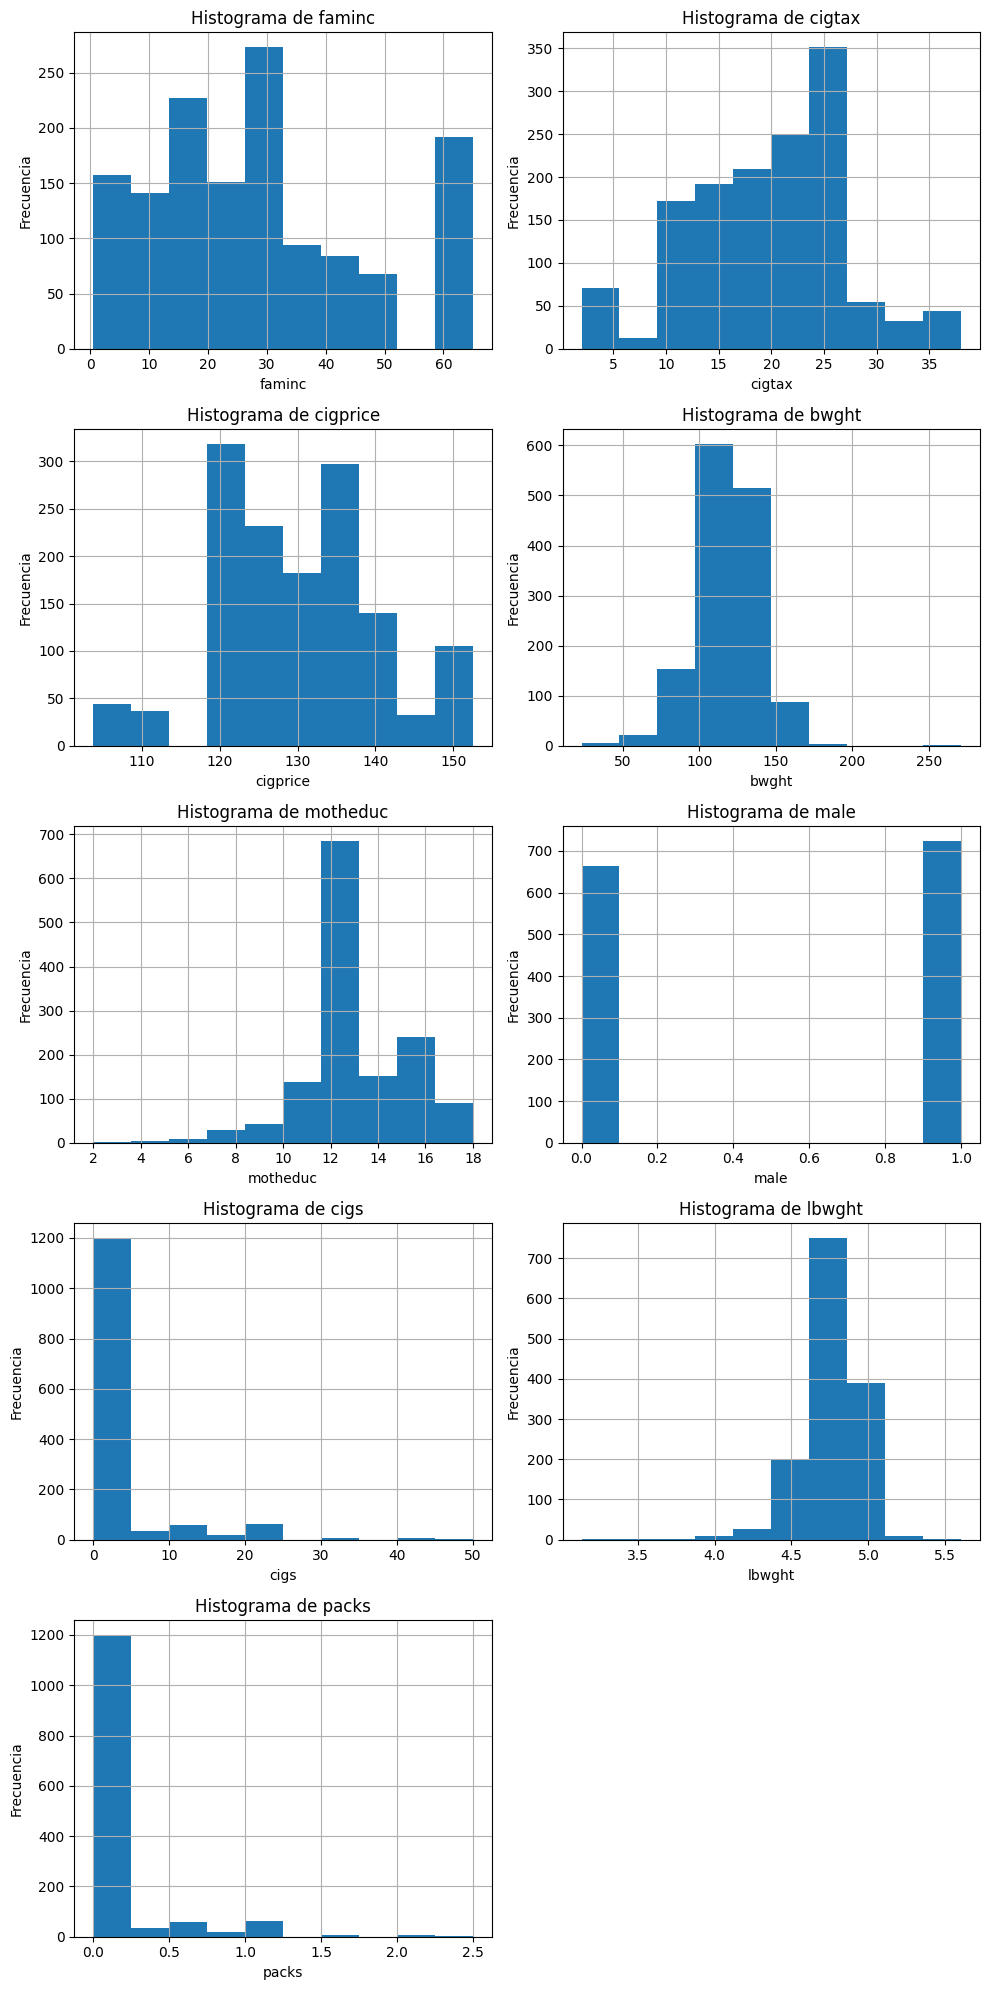

In [9]:
def plot_histograms(data):
    num_cols = len(data.columns)
    num_rows = (num_cols + 1) // 2  # Calcular el número de filas necesarias

    fig, axes = plt.subplots(num_rows, 2, figsize=(10, num_rows * 4))

    for i, column in enumerate(data.columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        data[column].hist(ax=ax)
        ax.set_title(f'Histograma de {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frecuencia')

    # Si el número de columnas es impar, eliminar el último gráfico vacío
    if num_cols % 2 != 0:
        fig.delaxes(axes[num_rows - 1, 1])

    plt.tight_layout()
    plt.show()

plot_histograms(data)

Este análisis nos permite observar a primera vista la falta de normalidad en las variables, lo cual nos ayuda a tomar la decisión de usar la prueba de Spearman para las correlaciones.

# Correlaciones

In [10]:
# Separar varaible objetiva de predictoras
y = data[['bwght']]
x = data.drop('bwght', axis=1)

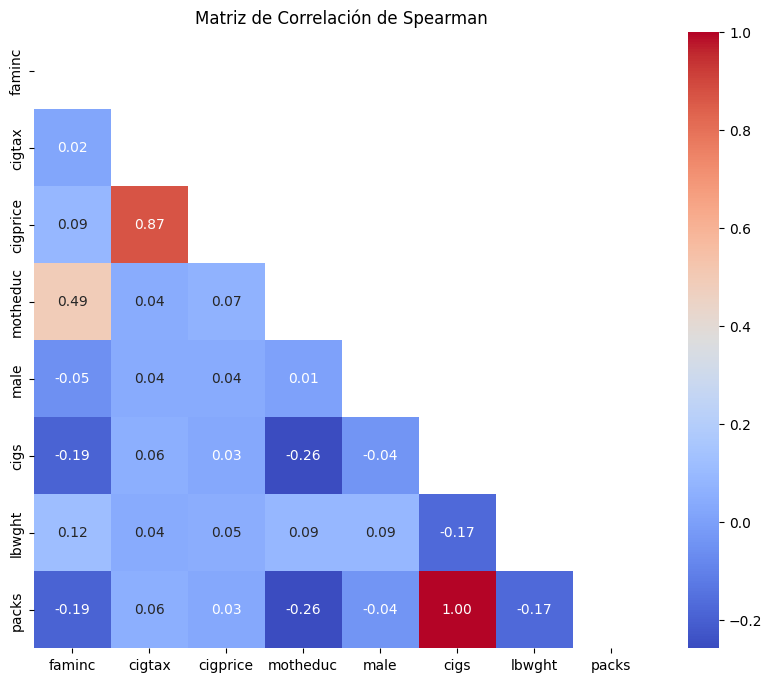

In [11]:
def spearman_correlation_matrix(df):

    # Calcular la matriz de correlación de Spearman
    spearman_corr_matrix = df.corr(method='spearman')

     # Crear una máscara para mostrar solo la mitad inferior de la matriz
    mask = np.triu(np.ones_like(spearman_corr_matrix, dtype=bool))

    # Crear el mapa de calor
    plt.figure(figsize=(10, 8))
    sns.heatmap(spearman_corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title('Matriz de Correlación de Spearman')
    plt.show()

spearman_correlation_matrix(x)

De este análisis de correlación, las variables que muestran una correlación perfecta indican que una fue construida a partir de la otra y que han sufrido una transformación. Por lo tanto, se puede conservar solo una de estas variables, eliminando así 'packs' y 'cigtax'

In [12]:
x = x.drop(['cigtax', 'packs'], axis=1)

In [13]:
def matriz_spearman_obj(dataframe, variables):
    num_variables = len(variables)
    table = pd.DataFrame(index=variables, columns=['bwght'])

    for i in range(num_variables):
        variable1 = 'bwght'
        variable2 = variables[i]

        # Calcular la correlación de Spearman y el p-valor
        correlation, p_value = spearmanr(dataframe[variable1], dataframe[variable2])

        # Almacenar el valor de correlación en el DataFrame para la variable actual
        table.loc[variable2, 'bwght'] = correlation

    return table

In [14]:
matriz_spearman_obj(data, x.columns)

,bwght
faminc,0.119375
cigprice,0.047891
motheduc,0.089859
male,0.087892
cigs,-0.170008
lbwght,1.0


De aquí se elimina 'lbwght', ya que explica al 100% la variable objetivo. Esto se debe a que es una transformación de la unidad de la variable objetivo, por lo que se elimina para evitar redundancia en el modelo.

In [15]:
data = data.drop(['cigtax', 'packs','lbwght'], axis=1)

In [17]:
data.columns

Index(['faminc', 'cigprice', 'bwght', 'motheduc', 'male', 'cigs'], dtype='object')

# Base de datos elegida 

In [19]:
data.to_csv('df_modelo.csv', index = False)